In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

In [31]:
covid = pd.read_csv(r'caso.csv', encoding = "utf-8")

In [32]:
covidRecife = covid[covid.city == 'Recife'].sort_values(by=['date'], ascending=True)
covidRecife.reset_index(inplace=True, drop=True)
covidRecife.tail()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
131,2020-07-25,PE,Recife,city,25429,2079,132,False,1645727.0,2611606.0,1545.15299,0.0818
132,2020-07-26,PE,Recife,city,25740,2084,133,False,1645727.0,2611606.0,1564.05042,0.0810
133,2020-07-27,PE,Recife,city,25857,2086,134,False,1645727.0,2611606.0,1571.15974,0.0807
134,2020-07-28,PE,Recife,city,26011,2095,135,False,1645727.0,2611606.0,1580.51730,0.0805
135,2020-07-29,PE,Recife,city,26277,2109,136,True,1645727.0,2611606.0,1596.68037,0.0803


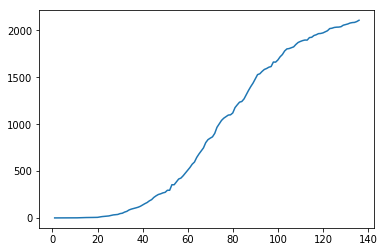

In [33]:
#quantidade de mortes total em relação ao dia
plt.plot(covidRecife['order_for_place'], (covidRecife['deaths']))

In [34]:
#first try with a for loop
def sub_column_value(newcolumn, subcolumn, table):
    table[newcolumn] = 0
    for index, i in enumerate(subcolumn):
        if index > 0:
            table[newcolumn][index] = (subcolumn[index] - subcolumn[index-1])

sub_column_value('deaths_per_day', covidRecife.deaths, covidRecife)
         
covidRecife.tail()



,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day
131,2020-07-25,PE,Recife,city,25429,2079,132,False,1645727.0,2611606.0,1545.15299,0.0818,10
132,2020-07-26,PE,Recife,city,25740,2084,133,False,1645727.0,2611606.0,1564.05042,0.0810,5
133,2020-07-27,PE,Recife,city,25857,2086,134,False,1645727.0,2611606.0,1571.15974,0.0807,2
134,2020-07-28,PE,Recife,city,26011,2095,135,False,1645727.0,2611606.0,1580.51730,0.0805,9
135,2020-07-29,PE,Recife,city,26277,2109,136,True,1645727.0,2611606.0,1596.68037,0.0803,14


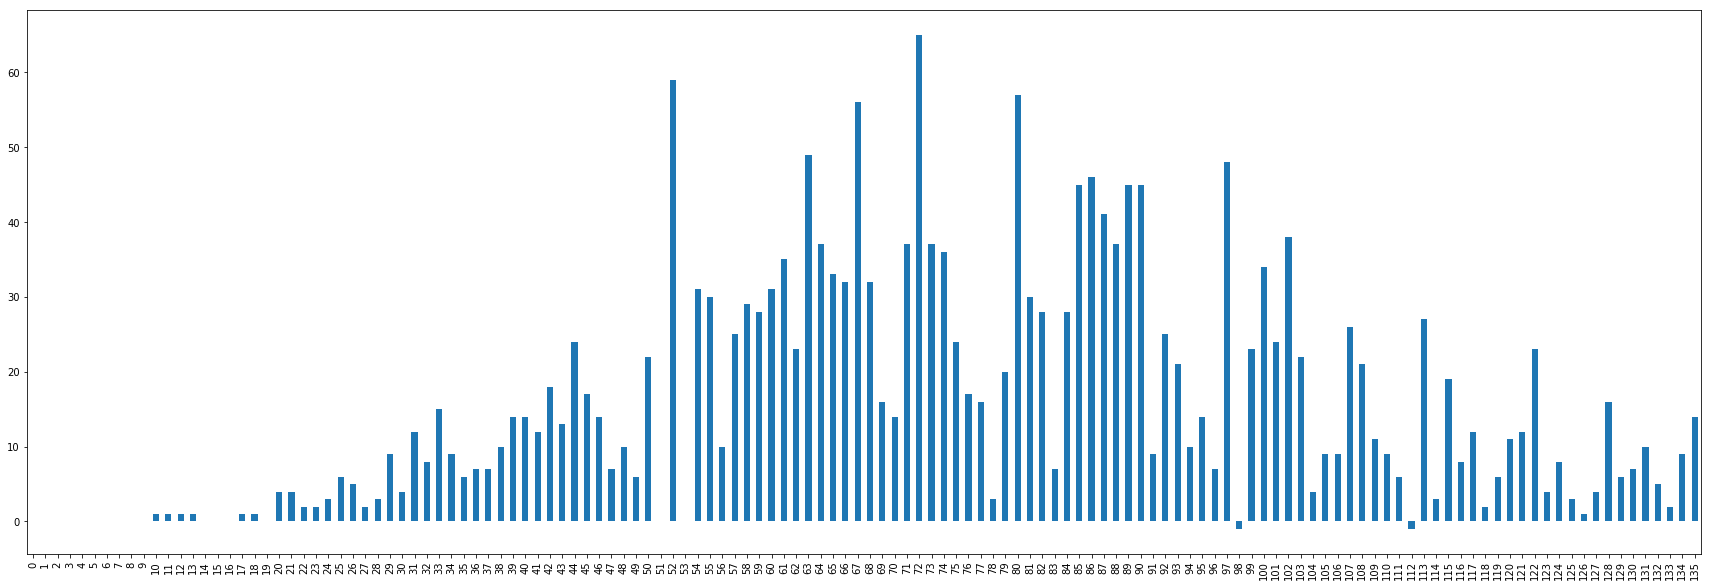

In [35]:
covidRecife['deaths_per_day'].plot(kind="bar", figsize=(30,10))

In [36]:
covidSP = covid[covid.city == 'São Paulo'].sort_values(by=['date'], ascending=True)
covidSP.reset_index(inplace=True, drop=True)
sub_column_value('deaths_per_day', covidSP.deaths, covidSP)         
covidSP.tail()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day
143,2020-07-26,SP,São Paulo,city,179777,9222,144,False,12252023.0,3550308.0,1467.32503,0.0513,17
144,2020-07-27,SP,São Paulo,city,182027,9241,145,False,12252023.0,3550308.0,1485.68934,0.0508,19
145,2020-07-28,SP,São Paulo,city,185708,9318,146,False,12252023.0,3550308.0,1515.73336,0.0502,77
146,2020-07-29,SP,São Paulo,city,188827,9396,147,False,12252023.0,3550308.0,1541.19038,0.0498,78
147,2020-07-30,SP,São Paulo,city,193684,9470,148,True,12252023.0,3550308.0,1580.83281,0.0489,74


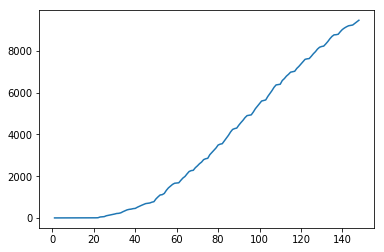

In [37]:
plt.plot(covidSP['order_for_place'], (covidSP['deaths']))

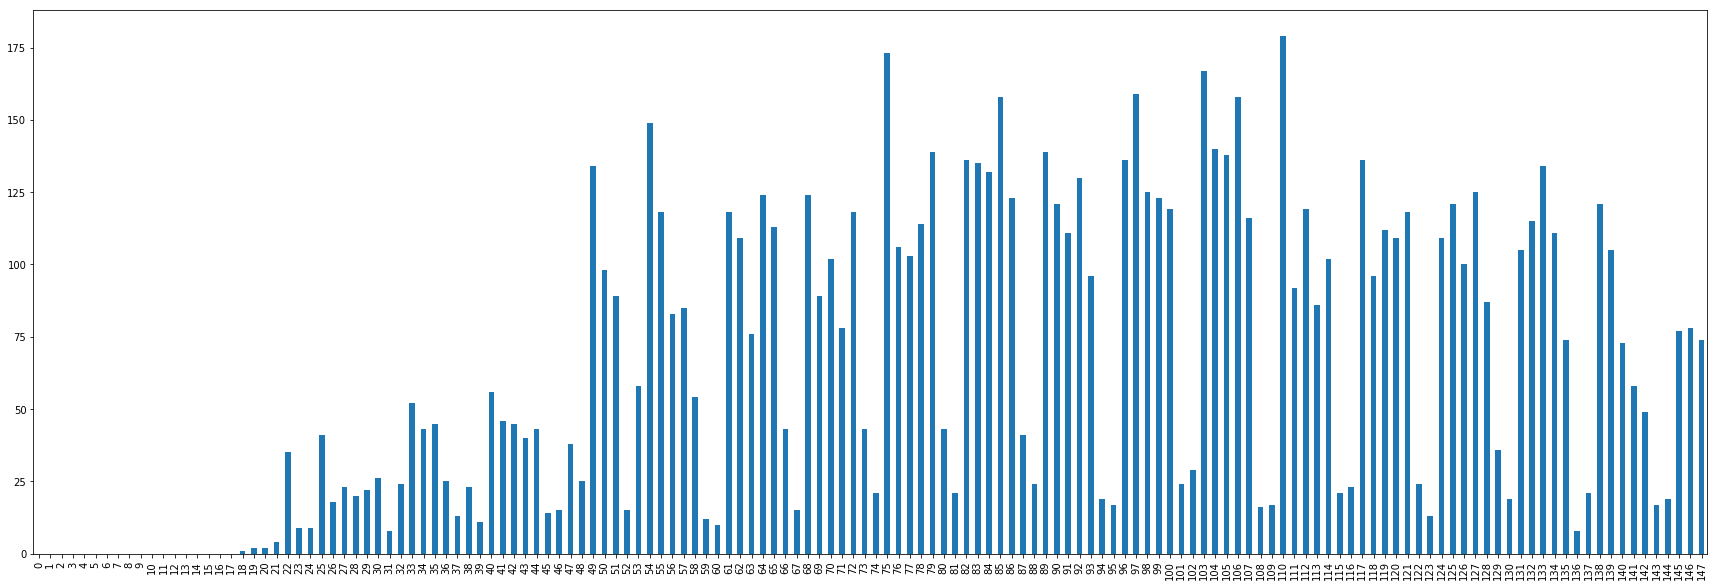

In [38]:
covidSP['deaths_per_day'].plot(kind="bar", figsize=(30,10))

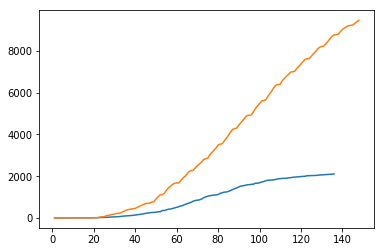

In [39]:
plt.plot(covidRecife['order_for_place'], covidRecife['deaths'], label="line 1")
plt.plot(covidSP['order_for_place'], covidSP['deaths'], label="line 2")

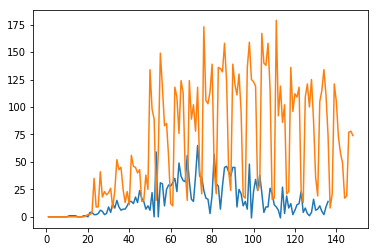

In [40]:
plt.plot(covidRecife['order_for_place'], covidRecife['deaths_per_day'], label="line 1")
plt.plot(covidSP['order_for_place'], covidSP['deaths_per_day'], label="line 2")

In [41]:
def deaths_per_day_per_1kk(newcolumn, table):
    population_per_1kk = table.estimated_population_2019[0] / 1000000
    table[newcolumn] = table.deaths_per_day / population_per_1kk

deaths_per_day_per_1kk('deaths_per_day_per_1kk_inhabitants', covidRecife)

In [42]:
deaths_per_day_per_1kk('deaths_per_day_per_1kk_inhabitants', covidSP)


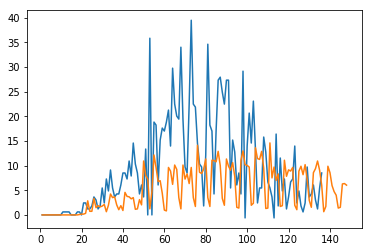

In [43]:
# linha azul => recife / linha laranja => São Paulo
plt.plot(covidRecife['order_for_place'], covidRecife['deaths_per_day_per_1kk_inhabitants'], label="Recife")
plt.plot(covidSP['order_for_place'], covidSP['deaths_per_day_per_1kk_inhabitants'], label="São Paulo")

In [44]:
covidRecife.describe()

,confirmed,deaths,order_for_place,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day,deaths_per_day_per_1kk_inhabitants
count,136.000000,136.000000,136.000000,136.0,136.0,136.000000,136.000000,136.000000,136.000000
mean,11460.963235,912.095588,68.500000,1645727.0,2611606.0,696.407317,0.070254,15.507353,9.422798
std,9298.130331,794.606363,39.403892,0.0,0.0,564.986193,0.022550,15.212079,9.243379
min,2.000000,0.000000,1.000000,1645727.0,2611606.0,0.121530,0.000000,-1.000000,-0.607634
25%,1225.250000,91.750000,34.750000,1645727.0,2611606.0,74.450378,0.064600,3.000000,1.822903
50%,12723.500000,819.000000,68.500000,1645727.0,2611606.0,773.123365,0.074650,10.000000,6.076342
75%,20192.500000,1752.500000,102.250000,1645727.0,2611606.0,1226.965345,0.084400,24.250000,14.735129
max,26277.000000,2109.000000,136.000000,1645727.0,2611606.0,1596.680370,0.109600,65.000000,39.496223


In [45]:
covidSP.describe()

,confirmed,deaths,order_for_place,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day,deaths_per_day_per_1kk_inhabitants
count,148.000000,148.000000,148.000000,148.0,148.0,148.000000,148.000000,148.000000,148.000000
mean,60870.594595,3613.662162,74.500000,12252023.0,3550308.0,496.820766,0.057508,63.986486,5.222524
std,61514.761222,3238.064725,42.868014,0.0,0.0,502.078402,0.025278,52.180611,4.258938
min,1.000000,0.000000,1.000000,12252023.0,3550308.0,0.008160,0.000000,0.000000,0.000000
25%,6093.750000,418.750000,37.750000,12252023.0,3550308.0,49.736688,0.053100,17.000000,1.387526
50%,36059.500000,2845.500000,74.500000,12252023.0,3550308.0,294.314660,0.060900,47.500000,3.876911
75%,110975.750000,6606.000000,111.250000,12252023.0,3550308.0,905.774910,0.076325,113.250000,9.243371
max,193684.000000,9470.000000,148.000000,12252023.0,3550308.0,1580.832810,0.086500,179.000000,14.609832


{'boxes': [<matplotlib.lines.Line2D at 0x7f2114172518>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2114172cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f211417a6d8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f211417a390>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2114172630>,
  <matplotlib.lines.Line2D at 0x7f21141820f0>]}

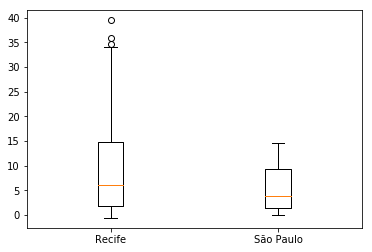

In [46]:
plt.boxplot([covidRecife.deaths_per_day_per_1kk_inhabitants, covidSP.deaths_per_day_per_1kk_inhabitants], labels=['Recife', 'São Paulo'])


In [47]:
# here i gathered the informations about deaths per day from both cities
crec_dp1kk = covidRecife.deaths_per_day_per_1kk_inhabitants[0:136:1]
csp_dp1kk = covidSP.deaths_per_day_per_1kk_inhabitants[0:136:1]

In [48]:
# here i concatenate both DataFrames and change the name of the tables using keys
df_rec_sp = pd.concat([crec_dp1kk, csp_dp1kk], axis=1, keys=['deaths_per_day_per_1kk_in_Recife', 'deaths_per_day_per_1kk_in_Sao_Paulo'])

In [49]:
df_rec_sp.describe()

,deaths_per_day_per_1kk_in_Recife,deaths_per_day_per_1kk_in_Sao_Paulo
count,136.000000,136.000000
mean,9.422798,5.263236
std,9.243379,4.360192
min,-0.607634,0.000000
25%,1.822903,1.285502
50%,6.076342,3.672863
75%,14.735129,9.406610
max,39.496223,14.609832


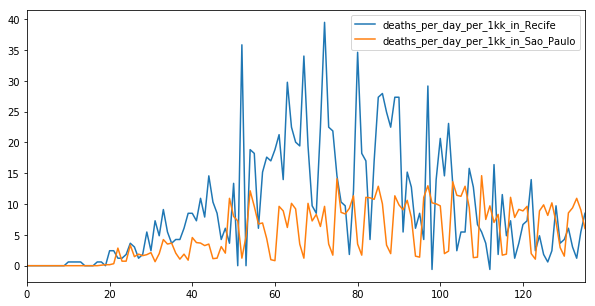

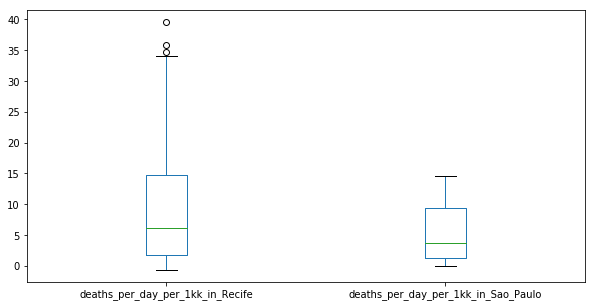

In [50]:
df_rec_sp.plot(kind='line', figsize=[10, 5])
df_rec_sp.plot(kind='box', figsize=[10, 5])

In [51]:
# check if the difference follows the gaussian
df_rec_sp['dpdp1kk_difference'] = df_rec_sp['deaths_per_day_per_1kk_in_Recife'] - df_rec_sp['deaths_per_day_per_1kk_in_Sao_Paulo']

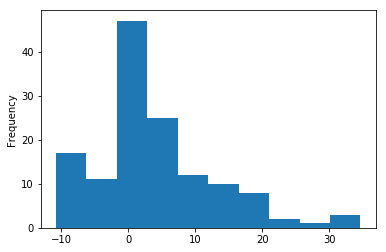

In [52]:
df_rec_sp['dpdp1kk_difference'].plot(kind='hist')

In [53]:
# Shapiro-Wilk normality test (value, p-value). Null hypothesis: the deaths in recife are not normally distributed.
stats.shapiro(df_rec_sp['dpdp1kk_difference'])

# a p-value less than the critical value shapiro => return (critical value, p-value) indicates that the null hypothesis was rejected

(0.9259414672851562, 1.5152786545513663e-06)

In [56]:
# executing the t-test
stats.ttest_rel(df_rec_sp['deaths_per_day_per_1kk_in_Recife'], df_rec_sp['deaths_per_day_per_1kk_in_Sao_Paulo'])

Ttest_relResult(statistic=5.38246564972097, pvalue=3.158163070386272e-07)

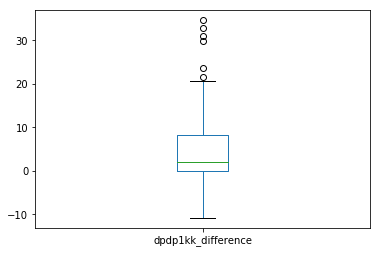

In [59]:
# checking symmetry
df_rec_sp['dpdp1kk_difference'].plot(kind='box')

In [60]:
stats.wilcoxon(df_rec_sp['deaths_per_day_per_1kk_in_Recife'], df_rec_sp['deaths_per_day_per_1kk_in_Sao_Paulo'])

WilcoxonResult(statistic=1913.0, pvalue=1.6211692977680056e-06)